In [12]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

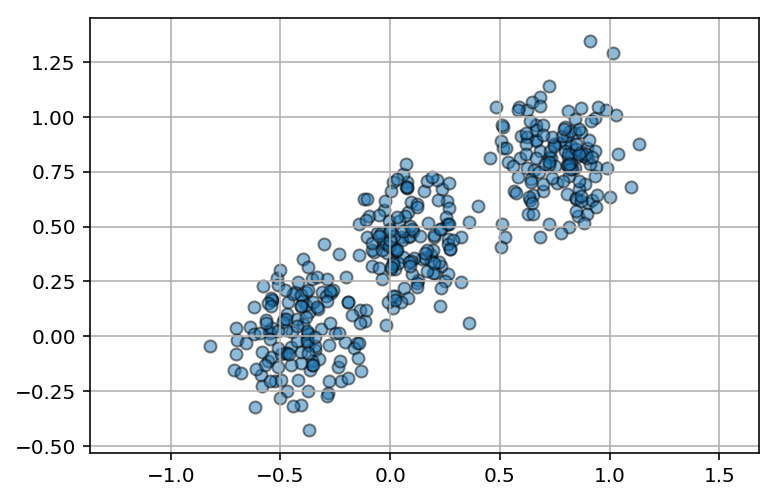

In [13]:
# generate 2d classification dataset
xy, _ = make_blobs(n_samples=400, center_box=(-1,1), centers=3,cluster_std=0.15, random_state=3)
# scatter plot, dots colored by class value
plt.scatter(xy[:,0], xy[:,1], edgecolors='k', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

## K Means Algorithm 직접 작성하기

- TODO1 : 현재 데이터에서 Centroid까지의 거리 구하기
- TODO2 : 현재 데이터에서 가장 가까운 Centroid의 index 구하기 : `np.argmin`
- TODO3 : 각 그룹 별로 Centroid 구하기

[[ 0.07870492 -0.3812468 ]
 [ 0.25817854  0.09917933]
 [-0.35165622  0.35266289]]


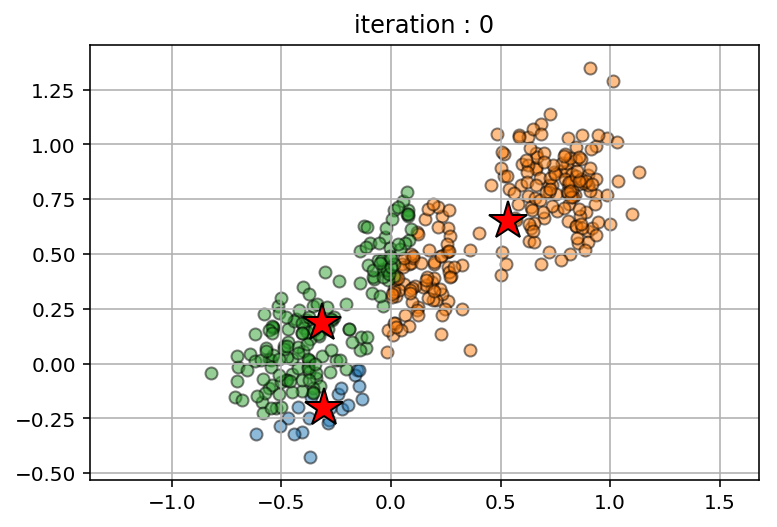

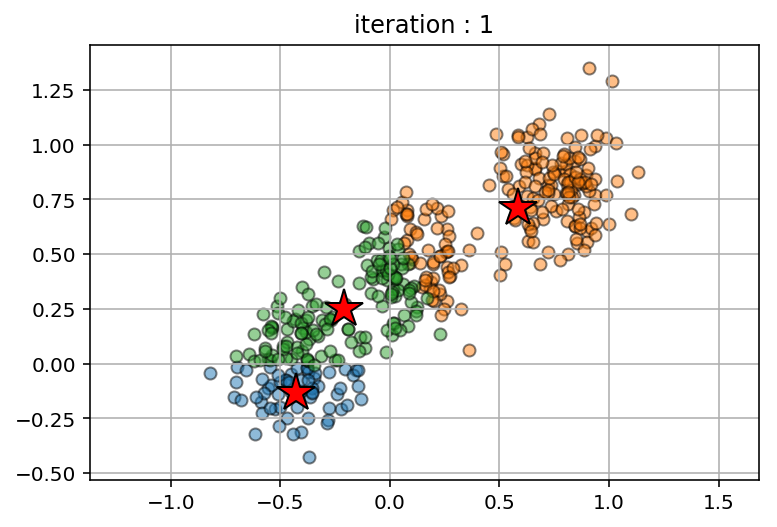

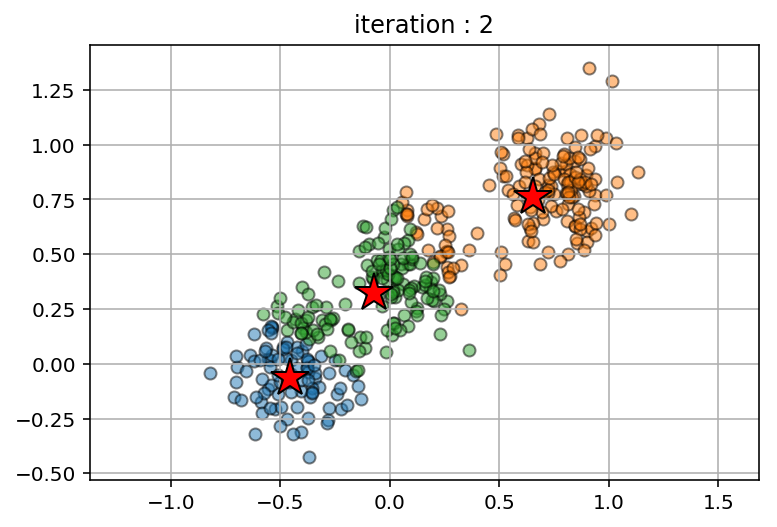

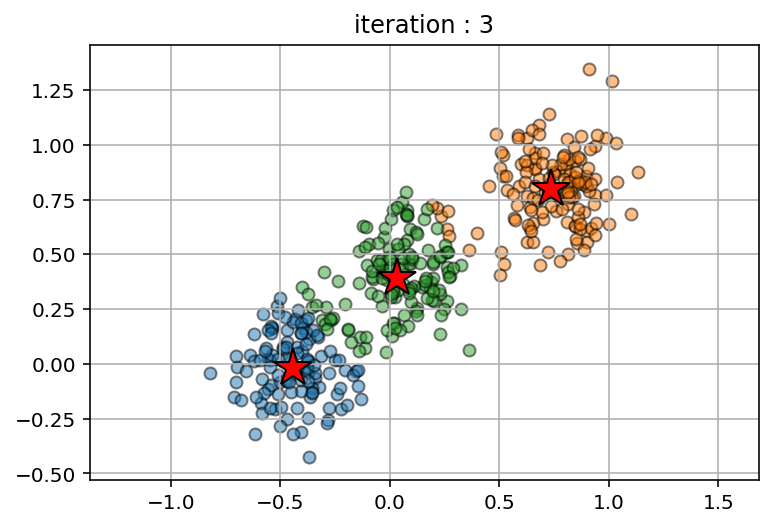

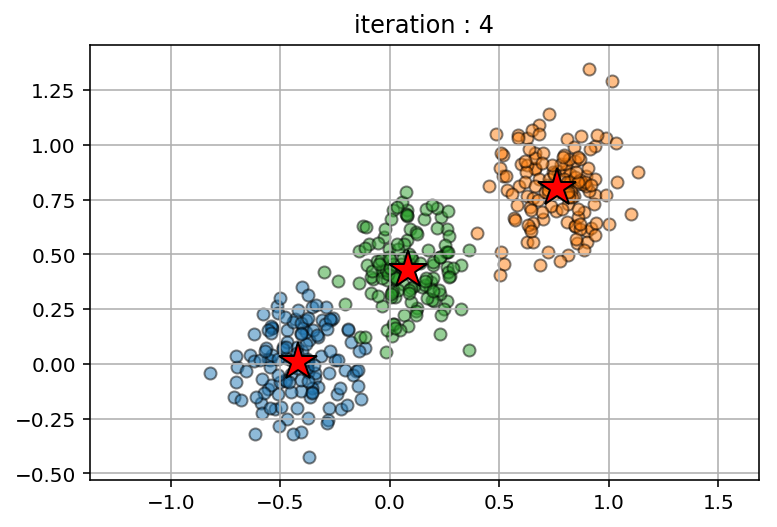

In [11]:
n_components = 3
center0 = xy[np.random.choice(len(xy), n_components), :]
center0 = np.random.rand(n_components,xy.shape[1]) - 0.5
print(center0)
for i in range(5):
    nearest_center0 = np.zeros(len(xy), dtype=np.int32)
    for k, xy_ in enumerate(xy):
        # TODO1
        distance2center0 = np.array([np.linalg.norm(xy_ - ith_center) for ith_center in center0])
        # TODO2
        nearest_center0[k] = np.argmin(distance2center0)

    for j in range(n_components):
        # TODO3
        center0[j, :] = np.mean(xy[nearest_center0 == j, :], 0)

    if i % 1 == 0:
        plt.plot(center0[:,0], center0[:,1], '*r',\
                 markersize=20, markeredgecolor='k')
        for label in np.unique(nearest_center0):
            plt.scatter(xy[nearest_center0==label,0], xy[nearest_center0==label,1], edgecolors='k', alpha=0.5)
        plt.axis('equal')
        plt.title('iteration : {0}'.format(i))
        plt.grid()
        plt.show()

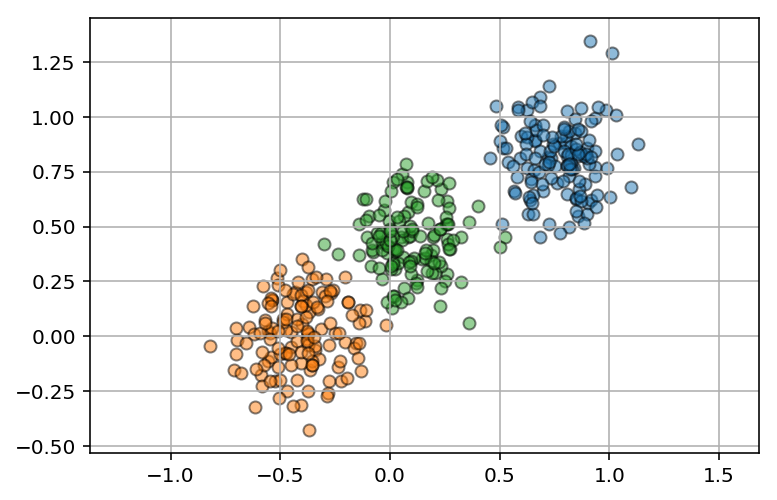

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(xy)
predicted_group = kmeans.predict(xy)
for label in np.unique(predicted_group):
    plt.scatter(xy[predicted_group==label,0], xy[predicted_group==label,1], edgecolors='k', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

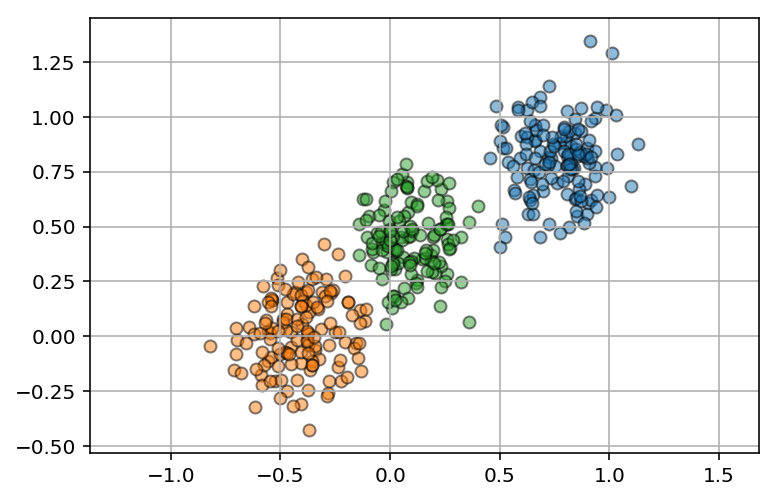

In [5]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3)
gm.fit(xy)
predicted_group = gm.predict(xy)
for label in np.unique(predicted_group):
    plt.scatter(xy[predicted_group==label,0], xy[predicted_group==label,1], edgecolors='k', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()